# Lab Course Machine Learning
# Exercise Sheet 3
November 21th, 2021

Syed Wasif Murtaza Jafri-311226

## Exercise 1: Gradient Descent on Rosenbrock function

### 1. Implement a 3D plot to visualize the function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.rcParams['figure.figsize'] = (10 ,8)
from sympy import symbols, diff
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

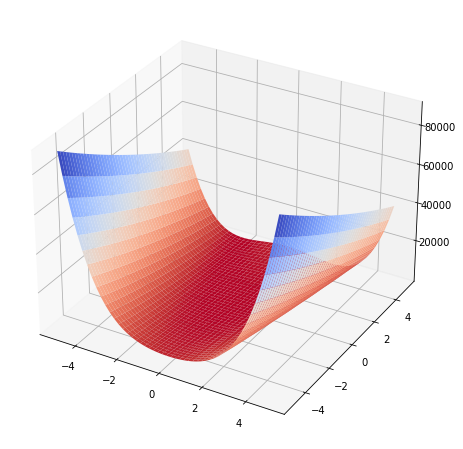

In [3]:
def f(x,y):
    a=1
    b=100
    return ((a-x)**2 )+ b*((y-x**2)**2)

N = 50  

x_values = np.linspace(-5, 5, N)
y_values = np.linspace(-5, 5, N)

# creates grif
X, Y = np.meshgrid(x_values, y_values)

Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=cm.coolwarm_r, edgecolor='none');

### 2. Derive the partial gradients.

$f(x,y) = {(a-x)^2 + b(y - x^2)^2}$

Partial gradient:

$\frac{\partial f}{\partial x} = {2(x-a) - 4bx(y - x^2)}$

$\frac{\partial f}{\partial y} = {2b(y - x^2)}$

### 3. Convert the function and gradient of this function into equivalent code representation.

In [4]:
def f(x,y):
    a=1
    b=100
    return ((a-x)**2 )+ b*((y-x**2)**2)

def gradient (x,y):

    x_grad = -400*x*(-x**2 + y) + 2*x - 2
    y_grad = -200*x**2 + 200*y
    return np.array([x_grad, y_grad])

### 4. Optimize the function with Gradient Descent.

In [5]:


def GradDecent(X,Y,µ):
    numberIterations = 1000000 
    x_old = X
    y_old = Y
    xyList = np.zeros(shape=(numberIterations,2))
    for i in range (numberIterations):
        xGrad,yGrad = gradient(x_old,y_old)
        x_new = x_old -(µ* xGrad)
        y_new = y_old -(µ* yGrad)

        xyList[i] = [x_old,y_old]
        x_old = x_new
        y_old = y_new
        
    return xyList


### 5. Visualize the trajectory on the same 3D plot.

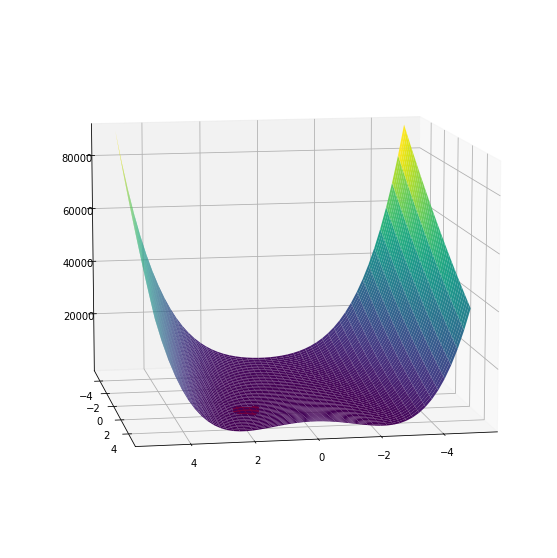

In [6]:
xy = GradDecent(2,2,0.000001)

zz = f(xy[:,0], xy[:,1])
N = 50  

x_values = np.linspace(-5, 5, N)
y_values = np.linspace(-5, 5, N)

# creates grif
X, Y = np.meshgrid(x_values, y_values)

Z = f(X, Y)

# data for the scatter
xx = xy[:,0]
yy = xy[:,1]
zz = f(xx,yy)
fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')

ax.view_init(elev=10., azim=80.)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.plot(xx, yy, zz, 'ro', alpha=0.5) # note the 'ro' (no '-') and the alpha
plt.show()

## Exercise 1: Gradient Descent on Rosenbrock function

In [139]:
adf = pd.read_fwf('datasets/airq402.data',sep = ' ',header=None,names=["City1", "City2", "Average Fare", "Distance","Average weekly passengers", "market leading airline", "market share", "Average fare","Low price airline","market share2","price"])
adf.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [140]:
cdf = pd.read_csv('datasets/winequality-red.csv',sep = ';')
cdf.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
pdf = pd.read_csv('datasets/parkinsons_updrs.data',sep = ',')
pdf.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


### 4. Are there any columns that can be dropped? if so, which ones are why.

### Wine Quality

In [142]:
cdf_cor = cdf.corr(method='pearson')
cdf_cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [143]:
cdf_cor.query('quality < 0.2 and quality>-0.2') 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731


These above columns can be droped because these have very week corelation.

### Air Quality

In [144]:
adf_cor = adf.corr(method='pearson')
adf_cor

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share2,price
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market share2,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


In [145]:
adf_cor.query('price < 0.2 and price>-0.2') 



,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share2,price
Average weekly passengers,-0.126175,-0.090131,1.0,-0.067605,-0.100946,0.034241,-0.142314


In [ ]:
These above columns can be droped because these have very week corelation.

### Parkisons Dataset

In [146]:
pdf_cor = pdf.corr(method='pearson')
pdf_cor

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


In [147]:
pdf_cor.query('total_UPDRS < 0.2 and total_UPDRS>-0.2') 



,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491
Jitter:DDP,0.120350,0.010258,0.076703,-0.028876,0.072698,0.064027,0.984184,0.844630,1.000000,0.947203,...,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660
Shimmer,0.146202,0.101554,0.058736,-0.033870,0.102349,0.092141,0.709791,0.649046,0.681729,0.732747,...,0.992334,0.979828,0.984904,0.935457,0.979827,0.795158,-0.801416,0.468235,0.132540,0.615709
Shimmer(dB),0.142864,0.111130,0.056481,-0.030962,0.110076,0.098790,0.716704,0.655871,0.685551,0.734591,...,1.000000,0.968015,0.976373,0.936338,0.968014,0.798077,-0.802496,0.472409,0.126111,0.635163
Shimmer:APQ3,0.112950,0.098912,0.044937,-0.029020,0.084261,0.079363,0.664149,0.623830,0.650226,0.676711,...,0.968015,1.000000,0.962723,0.885695,1.000000,0.732736,-0.780697,0.436878,0.130735,0.576704


In [ ]:
These above columns can be droped because these have very week corelation.

### 1. Convert any non-numeric values to numeric values.

In [12]:
adf = pd.get_dummies(adf)

In [13]:
cdf = pd.get_dummies(cdf)

In [14]:
pdf = pd.get_dummies(pdf)

### 2 . If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.

In [21]:
is_NaN = adf.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = adf[row_has_NaN]
rows_with_NaN

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX


In [22]:
is_NaN = cdf.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = cdf[row_has_NaN]
rows_with_NaN

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [23]:
is_NaN = pdf.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = pdf[row_has_NaN]
rows_with_NaN

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE


### 3. Split the dataset into 80% Train set and 20% Test set.

In [24]:
adf_train = adf.loc[0:math.floor(len(adf)*0.8)]
adf_test = adf.loc[math.floor(len(adf)*0.8)+1:]
len(adf) == len(adf_train)+ len(adf_test)
adf_train.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [25]:
cdf_train = cdf.loc[0:math.floor(len(cdf)*0.8)]
cdf_test = cdf.loc[math.floor(len(cdf)*0.8)+1:]
len(cdf) == len(cdf_train)+ len(cdf_test)
cdf_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
pdf_train = pdf.loc[0:math.floor(len(pdf)*0.8)]
pdf_test = pdf.loc[math.floor(len(pdf)*0.8)+1:]
len(pdf) == len(pdf_train)+ len(pdf_test)
pdf_train.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## Part B: Linear Regression with Real-World Data

In [31]:

def loss(X,Y,B):
    sum = 0
    for i in range (len(X)):    
        sum  = sum +((Y[i].T-np.dot(X[i],B)) ** 2)
    return sum

def lossGrad(X,Y,B):
    gradiant = np.zeros(len(X[0]))
    
    for i in range (len(X[0])):
        sum = 0 
        for j in range(len(X)):
            
            sum  = sum +((-2)*(Y[j].T-np.dot(X[j],B)) * X[j][i])
        gradiant[i] = sum
    return gradiant
def RMSE(x_test,y_test,B):
    rmse = 0
    for i in range (len(x_test)):
        rmse = rmse + (y_test[i]-np.dot(x_test[i],B))**2
    rmse  = np.sqrt(rmse/len(x_test))
    return rmse
        

    
def GradDecent(X,Y,µ,B,xtest,ytest):
    B_old = np.zeros(len(X[0]))
    numberIterations = 600
    fold__min_fnew_List = np.zeros(numberIterations)
    rmse_List = np.zeros(numberIterations)
    for i in range (numberIterations):
        B_new = B_old -(µ* lossGrad(X,Y,B_old))
        fold__min_fnew_List[i]= abs(loss(X,Y,B_old)-loss(X,Y,B_new))
        rmse_List[i] = RMSE(xtest,ytest,B_old)
        B_old = B_new
        
        
        
    return B_old,fold__min_fnew_List,rmse_List

        

## µ = 10**(-7)

### Wine Quality Dataset

In [149]:
X_train = cdf_train.loc[:, cdf_train.columns != 'quality']
Y_train = cdf_train[['quality']]
X_test = (cdf_train.loc[:, cdf_train.columns != 'quality']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))

X_test = np.append(bias_column,X_test,axis=1)
Y_test = (cdf_train[['quality']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-7)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)



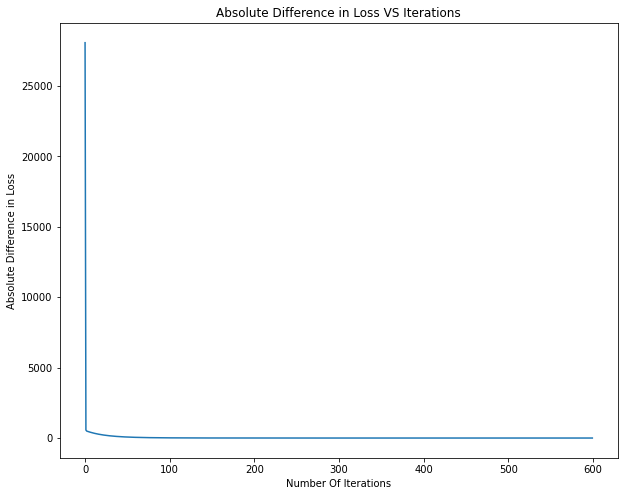

In [34]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

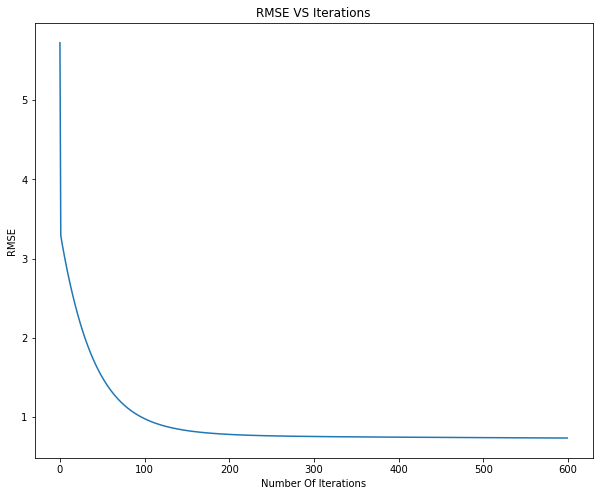

In [35]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Air Travel Dataset

In [150]:
X_train = adf_train.loc[:, adf_train.columns != 'price']
Y_train = adf_train[['price']]

X_test = (adf_train.loc[:, adf_train.columns != 'price']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (adf_train[['price']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-7)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)


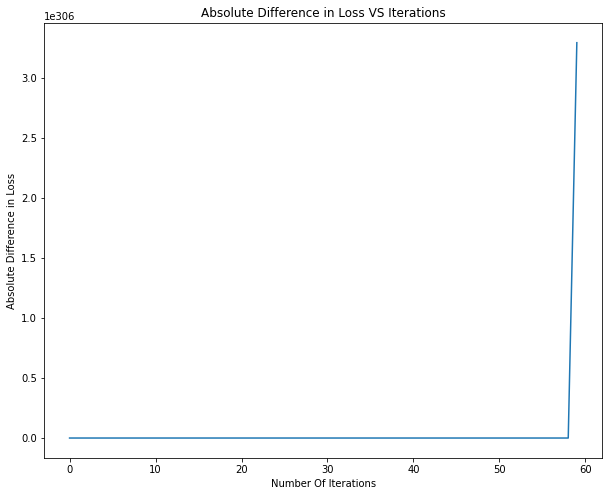

In [37]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

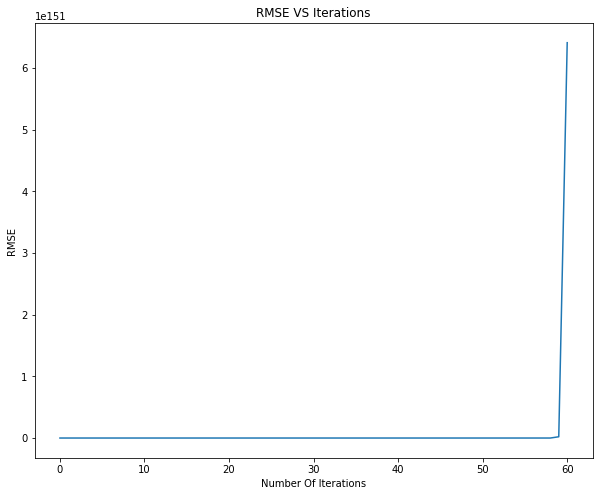

In [38]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Parkinsons Dataset

In [39]:
X_train = pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']
Y_train = pdf_train[['total_UPDRS']]

X_test = (pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (pdf_train[['total_UPDRS']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-7)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)



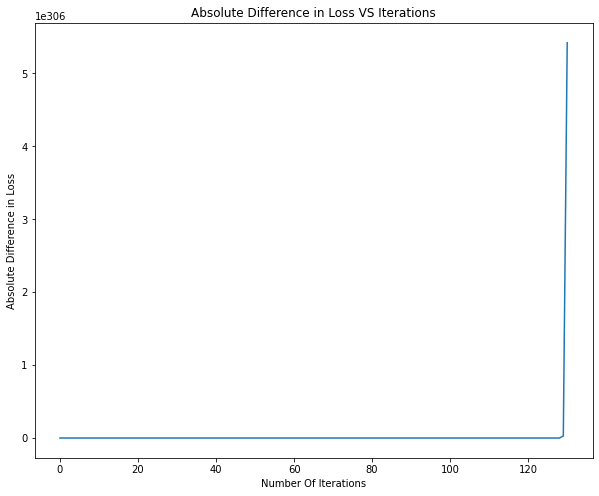

In [40]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

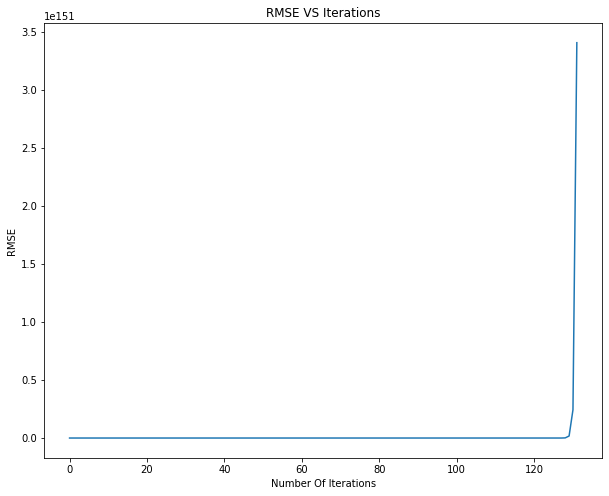

In [41]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

## µ = 10**(-6)

### Wine Quality Dataset

In [151]:
X_train = cdf_train.loc[:, cdf_train.columns != 'quality']
Y_train = cdf_train[['quality']]
X_test = (cdf_train.loc[:, cdf_train.columns != 'quality']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))

X_test = np.append(bias_column,X_test,axis=1)
Y_test = (cdf_train[['quality']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-6)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)



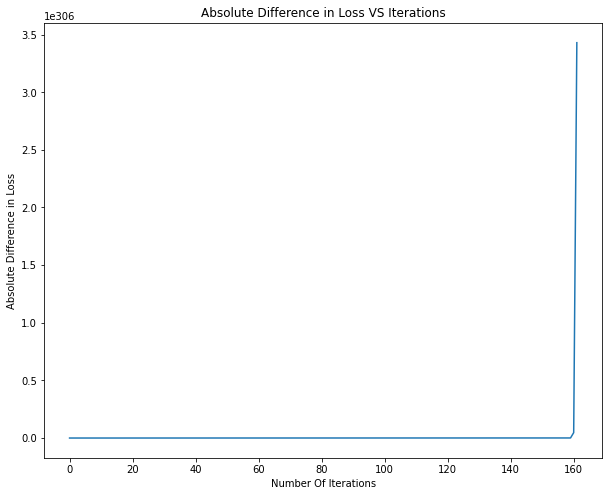

In [152]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

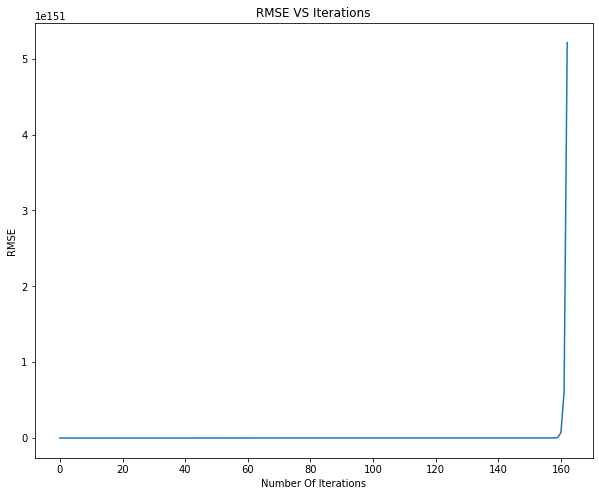

In [153]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Air Travel Dataset

In [154]:
X_train = adf_train.loc[:, adf_train.columns != 'price']
Y_train = adf_train[['price']]

X_test = (adf_train.loc[:, adf_train.columns != 'price']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (adf_train[['price']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-6)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)


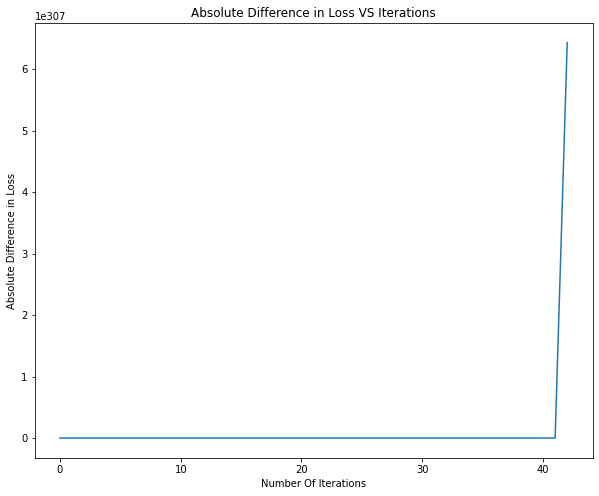

In [155]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

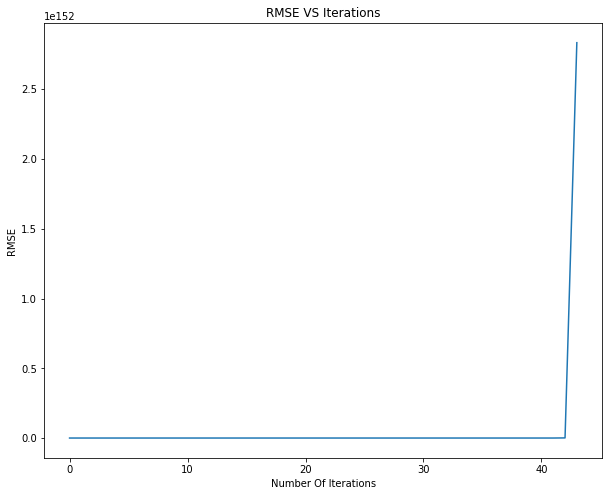

In [156]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Parkinsons Dataset

In [ ]:
X_train = pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']
Y_train = pdf_train[['total_UPDRS']]

X_test = (pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (pdf_train[['total_UPDRS']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-6)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)



In [ ]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

In [ ]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### µ = 10**(-5)

### Wine Quality Dataset

In [ ]:
X_train = cdf_train.loc[:, cdf_train.columns != 'quality']
Y_train = cdf_train[['quality']]
X_test = (cdf_train.loc[:, cdf_train.columns != 'quality']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))

X_test = np.append(bias_column,X_test,axis=1)
Y_test = (cdf_train[['quality']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-5)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)



In [ ]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

In [ ]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Air Travel Dataset

In [ ]:
X_train = adf_train.loc[:, adf_train.columns != 'price']
Y_train = adf_train[['price']]

X_test = (adf_train.loc[:, adf_train.columns != 'price']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (adf_train[['price']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-5)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)


In [ ]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

In [ ]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Parkinsons Dataset

In [ ]:
X_train = pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']
Y_train = pdf_train[['total_UPDRS']]

X_test = (pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (pdf_train[['total_UPDRS']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

µ = 10**(-5)
B,fold__min_fnew_List,rmse = GradDecent(X,Y,µ,B,X_test,Y_test)



In [ ]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

In [ ]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

## Exercise 3: Steplength Control for Gradient Descent

### 1. steplength-backtracking

In [70]:
def stepLengthBacktracking(X,Y,B_old,xtest,ytest):
    µ =1
    ß = 0.0011
    a = 0.005
    B_new = B_old -(µ* lossGrad(X,Y,B_old))
    i= 0
    fold__min_fnew_List = []
    rmse_List = []
    while((loss(X,Y,B_new)) > (loss(X,Y,B_old) - (µ*a*np.dot(lossGrad(X,Y,B_old),lossGrad(X,Y,B_old))))):       
        B_new = B_old (µ* lossGrad(X,Y,B_old))
        fold__min_fnew_List.append(abs(loss(X,Y,B_old)-loss(X,Y,B_new)))
        print(RMSE(xtest,ytest,B_old))
        rmse_List.append(RMSE(xtest,ytest,B_old)[0])
        B_old = B_new
        i += 1
        µ = µ*ß
    print (i)      
    return fold__min_fnew_List,rmse_List,µ



#### Wine Quality Dataset

In [43]:
cdf_train
X_train = cdf_train.loc[:, cdf_train.columns != 'quality']
Y_train = cdf_train[['quality']]

X_test = (cdf_train.loc[:, cdf_train.columns != 'quality']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (cdf_train[['quality']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
fold__min_fnew_List,rmse_List,µ= stepLengthBacktracking(X,Y,B,X_test,Y_test)

[5.72282983]
[44375614.27355857]
[4.66494021e+11]
[4.92900566e+12]
[4.86629554e+12]
[4.86622744e+12]
[4.86622736e+12]
[4.86622736e+12]
8


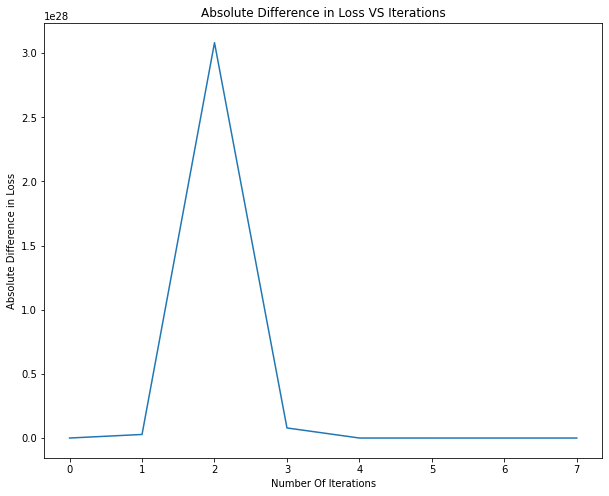

In [44]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

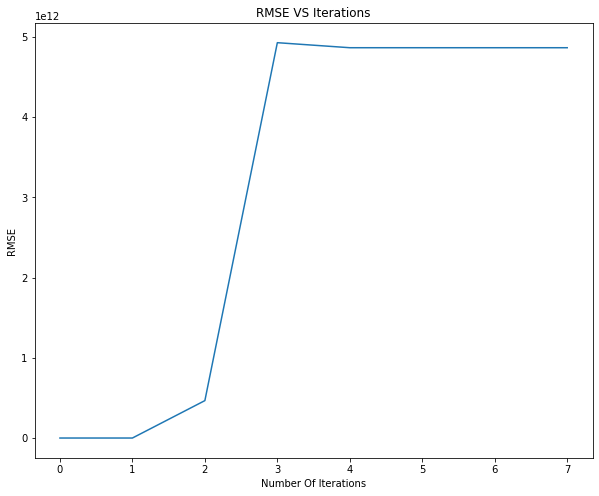

In [45]:
plt.plot(rmse_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Air Travel Dataset

In [46]:
X_train = adf_train.loc[:, adf_train.columns != 'price']
Y_train = adf_train[['price']]

X_test = (adf_train.loc[:, adf_train.columns != 'price']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (adf_train[['price']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
fold__min_fnew_List,rmse_List,µ= stepLengthBacktracking(X,Y,B,X_test,Y_test)


[151.03247514]
[4.23899403e+11]
[1.45834021e+18]
[5.52669217e+21]
[1.75214756e+22]
[1.74410973e+22]
[1.74410093e+22]
[1.74410092e+22]
8


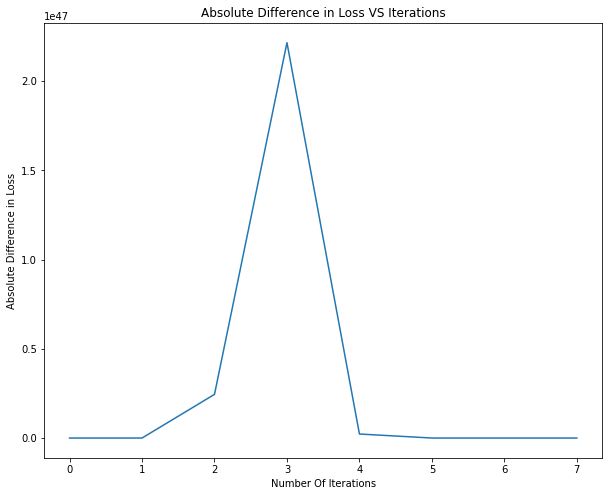

In [47]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

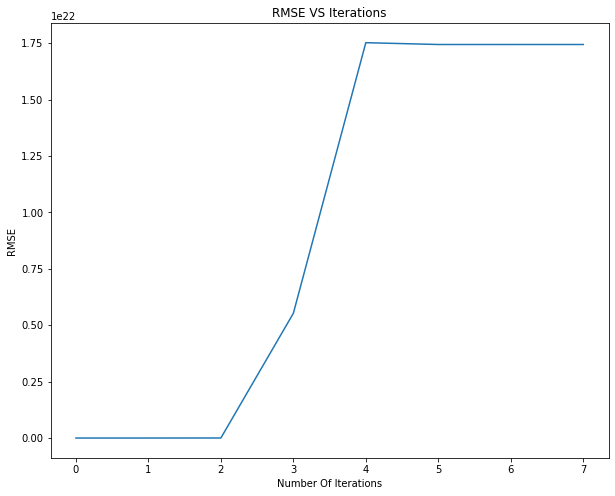

In [48]:
plt.plot(rmse_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Parkinsons Dataset

In [49]:
X_train = pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']
Y_train = pdf_train[['total_UPDRS']]

X_test = (pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (pdf_train[['total_UPDRS']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
fold__min_fnew_List,rmse_List,µ= stepLengthBacktracking(X,Y,B,X_test,Y_test)



[28.77880161]
[3.8401614e+09]
[6.33242236e+14]
[1.14264404e+17]
[9.14586e+16]
[9.14385206e+16]
[9.14384985e+16]
[9.14384984e+16]
8


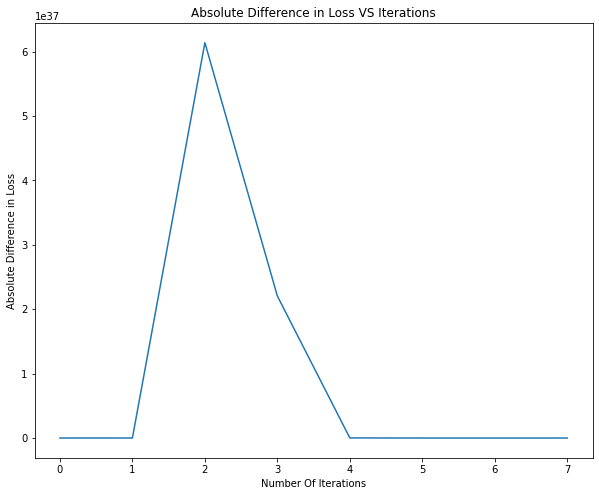

In [50]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

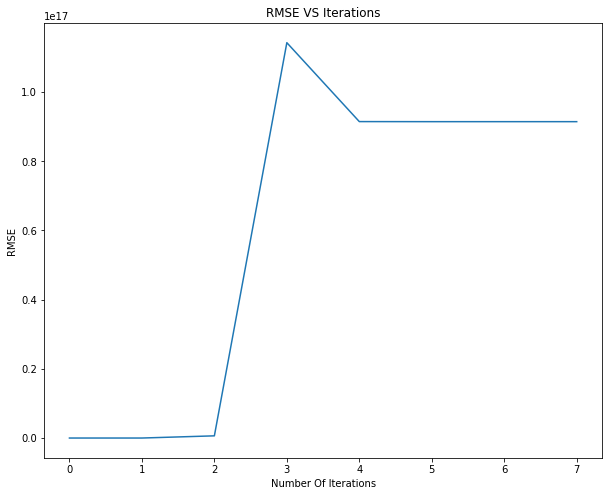

In [51]:
plt.plot(rmse_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

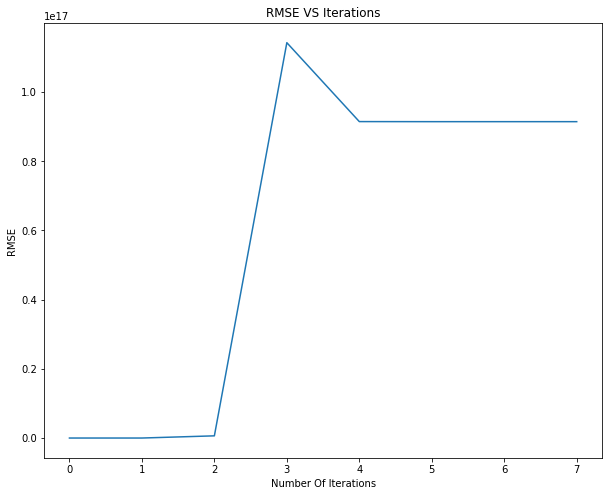

In [51]:
plt.plot(rmse_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### 2. steplength-bolddriver

In [89]:

def stepLengthBolddriver(X,Y,B_old,µ_old,µ_plus,µ_minus,xtest,ytest):
    µ =µ_old *µ_plus
    B_new = B_old -(µ* lossGrad(X,Y,B_old))
    i= 0
    fold__min_fnew_List = []
    rmse_List = []
    print('old',loss(X,Y,B_old))
    print('new',loss(X,Y,B_new))
    while((loss(X,Y,B_old) - (loss(X,Y,B_new))) <= 0): 
        B_old = B_new
        B_new = B_old -(µ* lossGrad(X,Y,B_old))
        fold__min_fnew_List.append(abs(loss(X,Y,B_old)-loss(X,Y,B_new)))
        print(RMSE(xtest,ytest,B_old))
        rmse_List.append(RMSE(xtest,ytest,B_old)[0])
        i += 1
        µ = µ*µ_minus
        print (i)      
    return fold__min_fnew_List,rmse_List,µ



In [94]:
cdf_train
X_train = cdf_train.loc[:, cdf_train.columns != 'quality']
Y_train = cdf_train[['quality']]

X_test = (cdf_train.loc[:, cdf_train.columns != 'quality']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (cdf_train[['quality']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
fold__min_fnew_List,rmse_List,µ= stepLengthBolddriver(X,Y,B,0.1,0.02,0.001,X_test,Y_test)

old [41921.]
new [1.00812159e+13]
[88746.54885269]
1
[1.69632594e+09]
2
[3.07331191e+10]
3


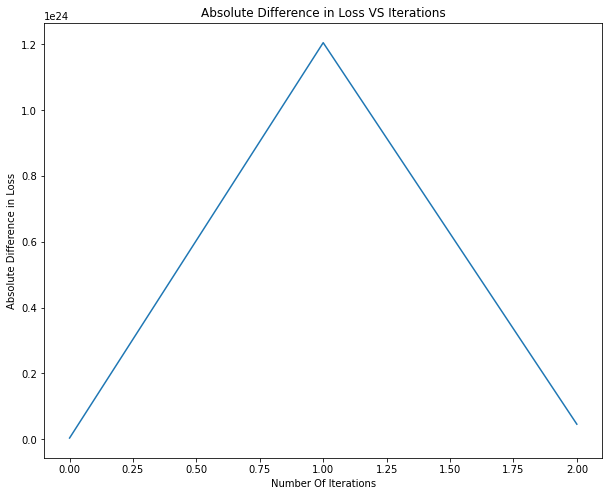

In [95]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

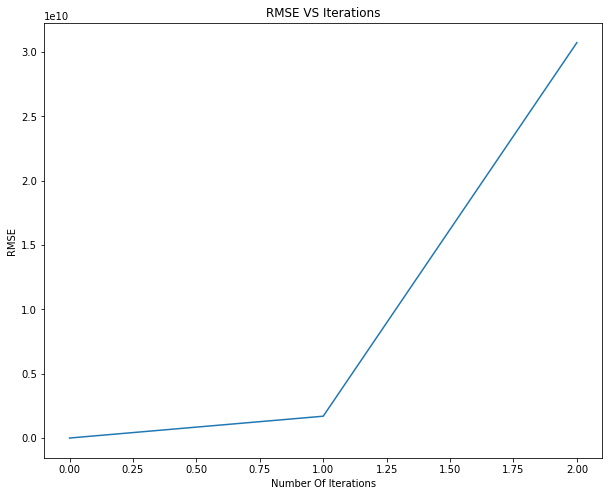

In [96]:
plt.plot(rmse_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

#### Wine Quality Dataset

In [122]:
cdf_train
X_train = cdf_train.loc[:, cdf_train.columns != 'quality']
Y_train = cdf_train[['quality']]

X_test = (cdf_train.loc[:, cdf_train.columns != 'quality']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (cdf_train[['quality']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
fold__min_fnew_List,rmse_List,µ= stepLengthBolddriver(X,Y,B,0.001,1.1,0.5,X_test,Y_test)
print(µ)

old [41921.]
new [3.04930416e+12]
[48808.49183588]
1
[5.13094674e+08]
2
[2.69698044e+12]
3
[7.08672347e+15]
4
[9.30717481e+18]
5
[6.10702152e+21]
6
[2.00054654e+24]
7
[3.26670626e+26]
8
[2.65078007e+28]
9
[1.06223842e+30]
10
[2.0752247e+31]
11
[1.92335314e+32]
12
[7.95130359e+32]
13
[1.2460027e+33]
14
6.7138671875e-08


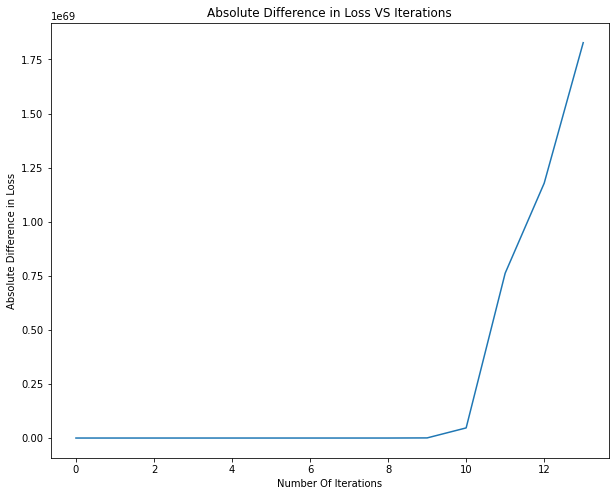

In [123]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

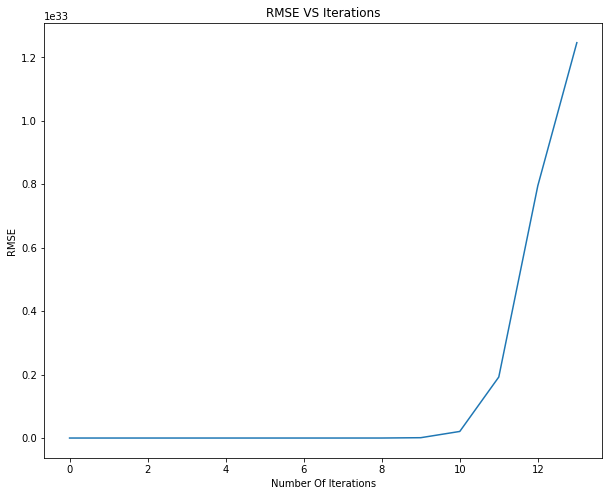

In [124]:
plt.plot(rmse_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Air Travel Dataset

In [101]:
X_train = adf_train.loc[:, adf_train.columns != 'price']
Y_train = adf_train[['price']]

X_test = (adf_train.loc[:, adf_train.columns != 'price']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (adf_train[['price']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
fold__min_fnew_List,rmse_List,µ= stepLengthBolddriver(X,Y,B,0.001,1.1,0.5,X_test,Y_test)


old [18271457.6459]
new [1.74157925e+20]
[4.66289206e+08]
1
[1.60417376e+15]
2
[2.76407279e+21]
3
[2.3816278e+27]
4
[1.02605863e+33]
5
[2.21024187e+38]
6
[2.38053975e+43]
7
[1.2819676e+48]
8
[3.45176005e+52]
9
[4.64684325e+56]
10
[3.12761431e+60]
11
[1.05238302e+64]
12
[1.77000866e+67]
13
[1.48760853e+70]
14
[6.2438849e+72]
15
[1.30723955e+75]
16
[1.36190289e+77]
17
[7.02616499e+78]
18
[1.77729629e+80]
19
[2.1590059e+81]
20
[1.20339731e+82]
21
[2.75207886e+82]
22


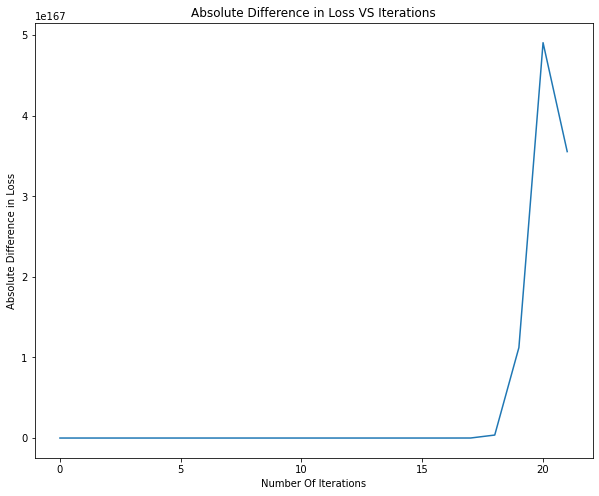

In [102]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

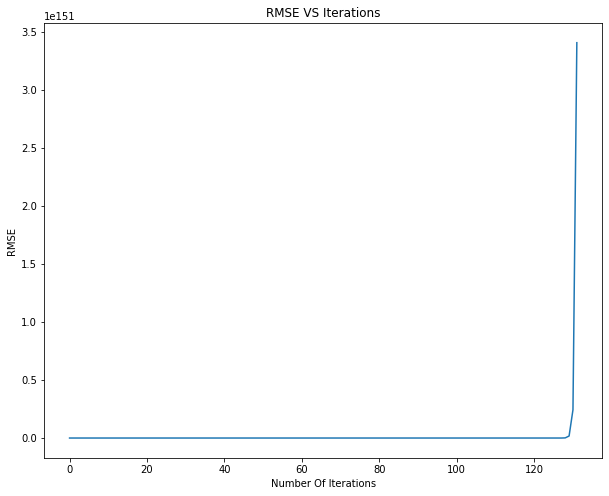

In [103]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### Parkinsons Dataset

In [104]:
X_train = pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']
Y_train = pdf_train[['total_UPDRS']]

X_test = (pdf_train.loc[:, pdf_train.columns != 'total_UPDRS']).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (pdf_train[['total_UPDRS']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
fold__min_fnew_List,rmse_List,µ= stepLengthBolddriver(X,Y,B,0.001,1.1,0.5,X_test,Y_test)



old [3893459.50415063]
new [8.38820951e+16]
[4224151.72379144]
1
[6.96562241e+11]
2
[5.74477782e+16]
3
[2.3689275e+21]
4
[4.8841588e+25]
5
[5.03473622e+29]
6
[2.59472621e+33]
7
[6.68485643e+36]
8
[8.60783689e+39]
9
[5.53768915e+42]
10
[1.77851497e+45]
11
[2.84709611e+47]
12
[2.26461974e+49]
13
[8.89331878e+50]
14
[1.70176739e+52]
15
[1.54310709e+53]
16
[6.22464199e+53]
17
[9.44227364e+53]
18


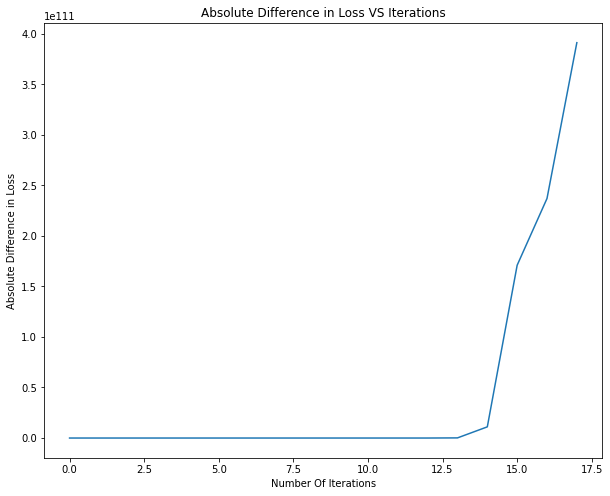

In [105]:
plt.plot(fold__min_fnew_List)
plt.xlabel('Number Of Iterations')
plt.ylabel('Absolute Difference in Loss')
plt.title ('Absolute Difference in Loss VS Iterations')
plt.show()

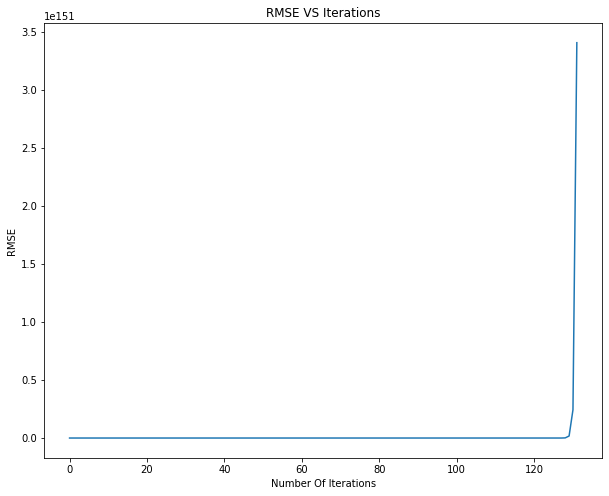

In [106]:
plt.plot(rmse)
plt.xlabel('Number Of Iterations')
plt.ylabel('RMSE')
plt.title ('RMSE VS Iterations')
plt.show()

### 3. Look-ahead optimizer

In [ ]:
Require: Initial parameters φ0, objective function L
Require: Synchronization period k, slow weights step
size α, optimizer A
for t = 1, 2, . . . do
Synchronize parameters θt,0 ← φt−1
for i = 1, 2, . . . , k do
sample minibatch of data d ∼ D
θt,i ← θt,i−1 + A(L, θt,i−1, d)
end for
Perform outer update φt ← φt−1 +α(θt,k −φt−1)
end for
return parameters φ

In [ ]:
def lookAheadOptimizer(X,Y,B_old,p,k,a,xtest,ytest):
    µ =µ_old *µ_plus
    B_new = B_old -(µ* lossGrad(X,Y,B_old))
    i= 0
    fold__min_fnew_List = []
    rmse_List = []
    numberOfIterations =500
    for t in range (500):
        
    while(loss(X,Y,B_old) - (loss(X,Y,B_new)) <= 0):       
        B_new = B_old -(µ* lossGrad(X,Y,B_old))
        fold__min_fnew_List.append(abs(loss(X,Y,B_old)-loss(X,Y,B_new)))
        print(RMSE(xtest,ytest,B_old))
        rmse_List.append(RMSE(xtest,ytest,B_old)[0])
        B_old = B_new
        i += 1
        µ = µ*µ_minus
    print (i)      
    return fold__min_fnew_List,rmse_List,µ

In [ ]:
r =[]

In [ ]:
r.append(3213)

In [ ]:
r